# Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)
### José Carlos Sánchez Gómez
### 30 de agosto del 2024


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# from google.colab import drive
# drive.mount('/content/drive')

In [53]:
data = pd.read_csv('../../../Valhalla23.csv')
scaler = StandardScaler()
data[['Celsius']] = scaler.fit_transform(data[['Celsius']])

'''
Noté que usando los valores normales de Celsius, SDGRegressor me regresaba la tendencia correcta, pero los valores
eran muy grandes, asi que decidí escalarlos, y se obtuv[].
'''
x_train, x_test, y_train, y_test = train_test_split(data[['Celsius']], data[['Valks']], test_size=0.2)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.5)

model = linear_model.SGDRegressor(max_iter = 100000000, random_state=4050, eta0=0.0001)
model.fit(x_train, y_train)

C:\Users\jcsg6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.0001, max_iter=100000000, random_state=4050)

In [54]:
mse_train_base = metrics.mean_squared_error(y_train, model.predict(x_train))
mse_validate_base = metrics.mean_squared_error(y_validate, model.predict(x_validate))
mse_test_base = metrics.mean_squared_error(y_test, model.predict(x_test))

print("MSE Entrenamiento: ", mse_train_base)
print("MSE Validación: ", mse_validate_base)
print("MSE Prueba: ", mse_test_base)

MSE Entrenamiento:  55.57232821051097
MSE Validación:  57.29103320051699
MSE Prueba:  31.181509886326932


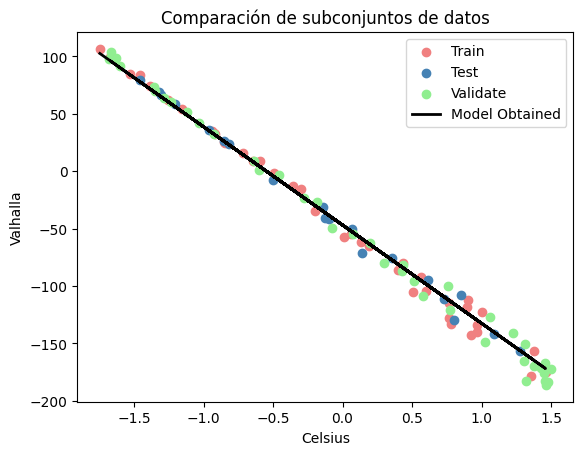

In [55]:
plt.scatter(x_train, y_train, color='lightcoral')
plt.scatter(x_test, y_test, color='steelblue')
plt.scatter(x_validate, y_validate, color="lightgreen")
plt.plot(x_train, model.predict(x_train), color='black', linewidth=2)
#Escribir la leyenda
plt.legend(["Train", "Test", "Validate", "Model Obtained"])
plt.title("Comparación de subconjuntos de datos")
plt.xlabel("Celsius")
plt.ylabel("Valhalla")
plt.show()

In [56]:
sizes = [2]
while len(sizes) != 20:
  random_number = random.randint(3, 39)
  if random_number not in sizes:
    sizes.append(random_number)
sizes

[2, 15, 20, 8, 26, 22, 36, 3, 28, 34, 7, 13, 17, 10, 19, 37, 21, 31, 30, 29]

In [57]:
mse_train_list, mse_validate_list = [], []

for size in sizes:
  x_train_size, _, y_train_size, _ = train_test_split(x_train[["Celsius"]], y_train[["Valks"]].values.ravel(), train_size=size)
  mse_train_average, mse_validate_average = 0, 0
  for _ in range(100):
    model.fit(x_train_size, y_train_size)
    mse_train = metrics.mean_squared_error(y_train_size, model.predict(x_train_size))
    mse_validate = metrics.mean_squared_error(y_validate, model.predict(x_validate))
    mse_train_average += mse_train
    mse_validate_average += mse_validate
  mse_train_average /= 100
  mse_validate_average /= 100
  mse_train_list.append(mse_train_average)
  mse_validate_list.append(mse_validate_average)

In [58]:
# Añadir a la lista los valores del modelo base (40 muestras)

sizes.append(len(x_train))
mse_train_list.append(mse_train_base)
mse_validate_list.append(mse_validate_base)

#### Comparación entre modelo 2 muestras y 40 muestras
##### (Corrección)

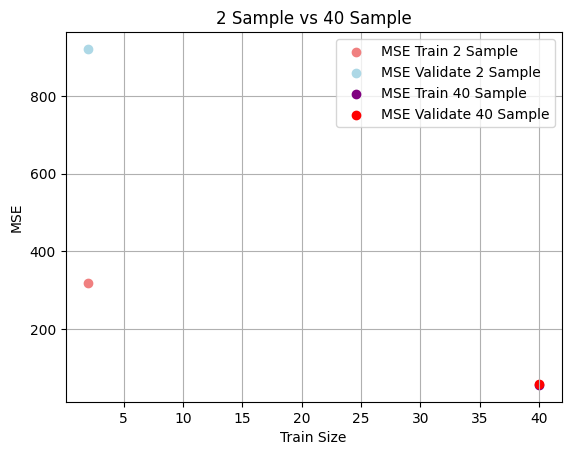

In [59]:
plt.scatter(sizes[0], mse_train_list[0], color='lightcoral', label = "MSE Train 2 Sample")
plt.scatter(sizes[0], mse_validate_list[0], color='lightblue', label = "MSE Validate 2 Sample")

plt.scatter(len(x_train), mse_train_base, color='purple', label = "MSE Train 40 Sample")
plt.scatter(len(x_train), mse_validate_base, color='red', label = "MSE Validate 40 Sample")

plt.title("2 Sample vs 40 Sample")
plt.xlabel("Train Size")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

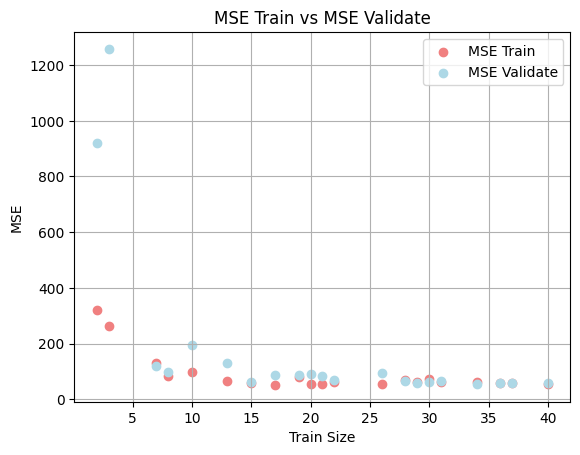

In [60]:
plt.scatter(sizes, mse_train_list, color='lightcoral', marker='o', linestyle='-', label="MSE Train")
plt.scatter(sizes, mse_validate_list, color='lightblue', marker='o', linestyle='-', label="MSE Validate")
plt.title("MSE Train vs MSE Validate")
plt.xlabel("Train Size")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

(Corrección)
Podemos observar que el modelo entrenado con dos muestras, se desempeña mucho peor que el modelo con 40, tanto en entrenamiento, como en validación. Además de esto, es evidente con la gráfica de MSE Train vs MSE Validate, que conforme aumenta la cantidad de entrenamiento, el MSE del modelo reduce considerablemente.

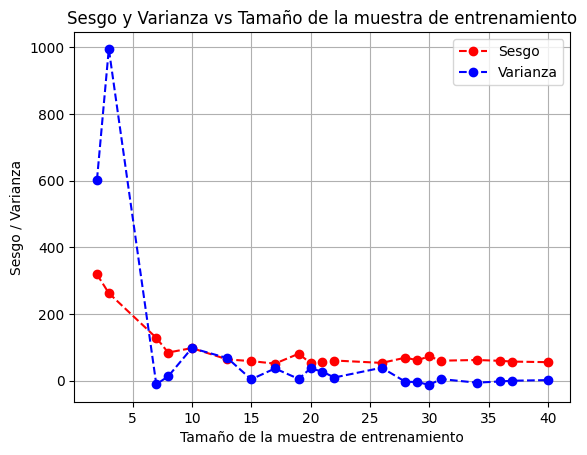

In [62]:
bias_list = mse_train_list
variance_list = [mse_validate - mse_train for mse_train, mse_validate in zip(mse_train_list, mse_validate_list)]

combined = list(zip(sizes, bias_list, variance_list))
combined_sorted = sorted(combined, key=lambda x: x[0])
sizes_sorted, bias_list_sorted, variance_list_sorted = zip(*combined_sorted)

plt.plot(sizes_sorted, bias_list_sorted, color='red', marker='o', linestyle='--', label="Sesgo")
plt.plot(sizes_sorted, variance_list_sorted, color='blue', marker='o', linestyle='--', label="Varianza")
plt.title("Sesgo y Varianza vs Tamaño de la muestra de entrenamiento")
plt.xlabel("Tamaño de la muestra de entrenamiento")
plt.ylabel("Sesgo / Varianza")
plt.legend()
plt.grid(True)
plt.show()

En esta grafica podemos entender como el sesgo y la varianza va disminuyendo conforme la cantidad de muestras para el entrenamiento aumenta. Por la cantidad pequeña que tenemos en el dataset de entrenamiento, y que los datos se comportan de manera lineal, nuesto modelo funciona bien con una cantidad minima de datos para el entrenamiento. A partir de una cantidad de 15, se puede notar una gran mejora en los valores de Sesgo y Varianza, sin embargo los mejores valores son cuando el tamaño de la muestra se acerca a 40.

### Entrenamiento de nuevo modelo con el tamaño de muestras óptimo (corrección)

In [72]:
optimal_size = sizes[mse_validate_list.index(min(mse_validate_list))]
print(f"El tamaño óptimo es: {optimal_size} muestras")

El tamaño óptimo es: 34 muestras
0.34


In [84]:
optimal_size_train = optimal_size / 100
x_train_size, _, y_train_size, _ = train_test_split(x_train, y_train, train_size=optimal_size_train)
model.fit(x_train_size, y_train_size)
mse_train_size = metrics.mean_squared_error(y_train_size, model.predict(x_train_size))
mse_validate_size = metrics.mean_squared_error(y_validate, model.predict(x_validate))
mse_test_size = metrics.mean_squared_error(y_test, model.predict(x_test))

print("Optimal Size MSE Train Subset: ", mse_train_size)
print("Optimal Size MSE Test: ", mse_test_size)
print("Optimal Size MSE Validate: ", mse_validate_size )

Optimal Size MSE Train Subset:  57.84249786569338
Optimal Size MSE Test:  30.84631782192676
Optimal Size MSE Validate:  49.84400749058453


C:\Users\jcsg6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Comparación Modelo Óptimo contra Modelo Base (corrección)

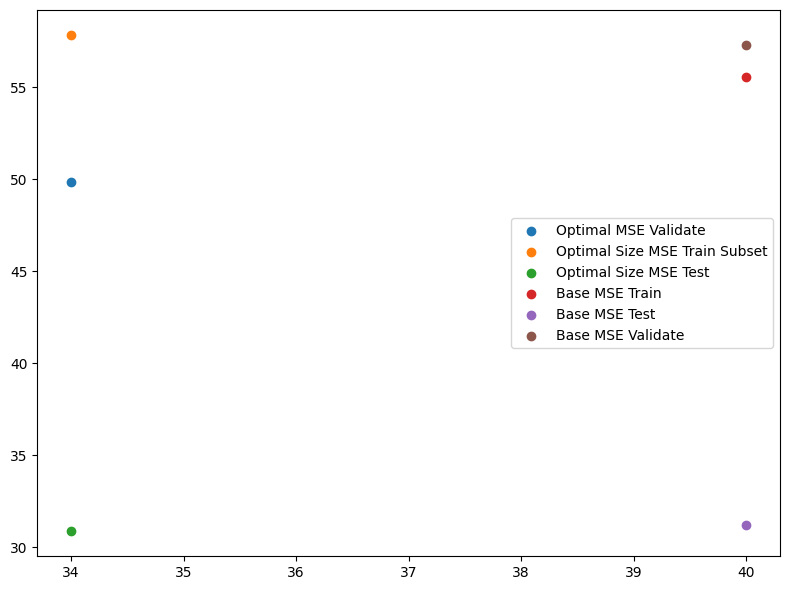

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(optimal_size, mse_validate_size, label="Optimal MSE Validate")
plt.scatter(optimal_size, mse_train_size, label="Optimal Size MSE Train Subset")
plt.scatter(optimal_size, mse_test_size, label="Optimal Size MSE Test")

plt.scatter(len(x_train), mse_train_base, label="Base MSE Train")
plt.scatter(len(x_train), mse_test_base, label="Base MSE Test")
plt.scatter(len(x_train), mse_validate_base, label="Base MSE Validate")

plt.legend(fontsize='medium')
plt.tight_layout()
plt.show()

Viendo los resultados del modelo óptimo, contra los del modelo base, podemos observar como los valores de los errores del modelo óptimo son iguales o menores que los del modelo base. Esto nos podría indicar que el modelo con menos muestras esta abstrayendo mejor la información para hacer predicciones y no se está sobreentrenando o sesgando hacia ciertos valores como el modelo con mayores muestras.

In [65]:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/AnálisisReporteDesempeño.ipynb